In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# parameter set:
# Total particle number 𝑁=10^6
# Calculate self potential: if the distance r between two particles < 170 pc, r = 170 pc
# Total potential = self potential + external potential
# Total kinetic energy = relative kinetic energy based on center point (self kinetic energy) + absolute kinetic energy
# Bound condition: self kinetic energy(= bound KE) < self potential(= bound PE)

In [2]:
# file_path = '/rhome/hsang012/bigdata/Gadget2/SIDM/codeSIDM3/output_testRun2_job/boundmass.txt'
file_path = '/Users/sanghaoyu/CLionProjects/Gadget-2/boundmass.txt'
data = pd.read_csv(file_path, sep=r'\s+', header=None)

In [3]:
data['y'] = data.iloc[:, -1] + data.iloc[:, -2]

In [4]:
print(data)

       0            1           2         3         4         5         6  \
0    4.2  271985024.0  58853275.0  0.000294  0.000232 -0.000271  0.000462   
1    7.4  273214816.0  58903325.0  0.000956  0.000173 -0.000476  0.001082   
2    1.0  279248128.0  58482450.0  0.000000 -0.000003 -0.000004  0.000005   
3    5.2  272004192.0  58839625.0  0.000455  0.000260 -0.000356  0.000633   
4    0.8  280076544.0  58568900.0 -0.000002 -0.000004 -0.000004  0.000005   
..   ...          ...         ...       ...       ...       ...       ...   
57   4.0  272102016.0  58984900.0  0.000271  0.000208 -0.000248  0.000422   
58   5.6  271861184.0  58868225.0  0.000541  0.000273 -0.000381  0.000716   
59  11.0  274650016.0  58971250.0  0.002232  0.000036 -0.000877  0.002398   
60   9.0  274971456.0  58983600.0  0.001402  0.000058 -0.000573  0.001516   
61   9.2  275030592.0  58960850.0  0.001480  0.000065 -0.000585  0.001593   

               7             8             9            10      11       12

In [5]:
# sort data by the first column
data_sorted = data.sort_values(by=0)

In [6]:
print(data_sorted)

       0            1           2         3         4         5         6  \
44   0.0  281829600.0  54226900.0  0.000000  0.000000  0.000000  0.000000   
5    0.2  281197152.0  56876625.0  0.000005 -0.000002  0.000004  0.000007   
25   0.4  280771072.0  58369025.0  0.000010  0.000005  0.000002  0.000011   
28   0.6  280403168.0  58318650.0  0.000008  0.000002  0.000008  0.000011   
4    0.8  280076544.0  58568900.0 -0.000002 -0.000004 -0.000004  0.000005   
..   ...          ...         ...       ...       ...       ...       ...   
16  11.4  274537568.0  58978725.0  0.002411  0.000011 -0.000955  0.002593   
35  11.6  274492064.0  58932900.0  0.002501  0.000004 -0.000976  0.002684   
30  11.8  274427712.0  58858150.0  0.002584 -0.000001 -0.001002  0.002771   
31  12.0  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   
47  12.2  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   

               7             8             9            10       11       1

In [7]:
print(data_sorted.shape)

(62, 17)


In [8]:
initial_value = data_sorted.loc[data_sorted.iloc[:, 0] == 0, 'y'].values[0]

In [9]:
print(initial_value)

-73058612589.71219


In [10]:
initial_value = abs(initial_value)

In [11]:
print(initial_value)

73058612589.71219


In [12]:
data_sorted['y_normalized'] = data_sorted['y'] / initial_value

In [13]:
print(data_sorted)

       0            1           2         3         4         5         6  \
44   0.0  281829600.0  54226900.0  0.000000  0.000000  0.000000  0.000000   
5    0.2  281197152.0  56876625.0  0.000005 -0.000002  0.000004  0.000007   
25   0.4  280771072.0  58369025.0  0.000010  0.000005  0.000002  0.000011   
28   0.6  280403168.0  58318650.0  0.000008  0.000002  0.000008  0.000011   
4    0.8  280076544.0  58568900.0 -0.000002 -0.000004 -0.000004  0.000005   
..   ...          ...         ...       ...       ...       ...       ...   
16  11.4  274537568.0  58978725.0  0.002411  0.000011 -0.000955  0.002593   
35  11.6  274492064.0  58932900.0  0.002501  0.000004 -0.000976  0.002684   
30  11.8  274427712.0  58858150.0  0.002584 -0.000001 -0.001002  0.002771   
31  12.0  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   
47  12.2  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   

               7             8             9            10       11       1

In [14]:
x_sorted = data_sorted.iloc[:, 0]  # First column
y_normalized = data_sorted['y_normalized']

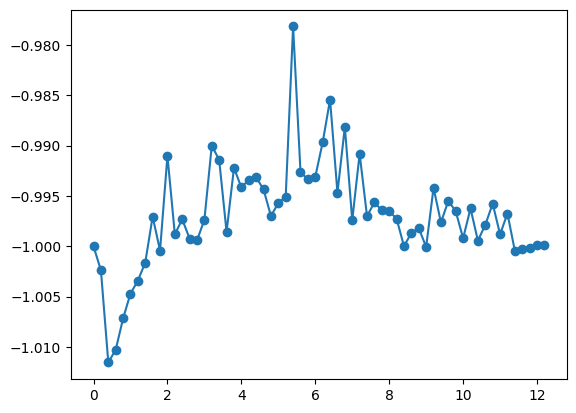

In [46]:
# plt.figure(figsize=(8, 5))
plt.plot(x_sorted, y_normalized, marker='o', linestyle='-', label='Normalized y')

In [21]:
data_sorted['y_total'] = data_sorted.iloc[:, 9] + data_sorted.iloc[:, 10]

In [22]:
print(data_sorted)

       0            1           2         3         4         5         6  \
44   0.0  281829600.0  54226900.0  0.000000  0.000000  0.000000  0.000000   
5    0.2  281197152.0  56876625.0  0.000005 -0.000002  0.000004  0.000007   
25   0.4  280771072.0  58369025.0  0.000010  0.000005  0.000002  0.000011   
28   0.6  280403168.0  58318650.0  0.000008  0.000002  0.000008  0.000011   
4    0.8  280076544.0  58568900.0 -0.000002 -0.000004 -0.000004  0.000005   
..   ...          ...         ...       ...       ...       ...       ...   
16  11.4  274537568.0  58978725.0  0.002411  0.000011 -0.000955  0.002593   
35  11.6  274492064.0  58932900.0  0.002501  0.000004 -0.000976  0.002684   
30  11.8  274427712.0  58858150.0  0.002584 -0.000001 -0.001002  0.002771   
31  12.0  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   
47  12.2  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   

               7             8             9            10       11       1

In [24]:
initial_total_energy_value = data_sorted.loc[data_sorted.iloc[:, 0] == 0, 'y_total'].values[0]

In [25]:
print(initial_total_energy_value)

-66875291946846.33


In [26]:
initial_total_energy_value = abs(initial_total_energy_value)

In [27]:
print(initial_total_energy_value)

66875291946846.33


In [33]:
data_sorted['y_total_energy_normalized'] = data_sorted['y_total'] / initial_total_energy_value

In [34]:
print(data_sorted)

       0            1           2         3         4         5         6  \
44   0.0  281829600.0  54226900.0  0.000000  0.000000  0.000000  0.000000   
5    0.2  281197152.0  56876625.0  0.000005 -0.000002  0.000004  0.000007   
25   0.4  280771072.0  58369025.0  0.000010  0.000005  0.000002  0.000011   
28   0.6  280403168.0  58318650.0  0.000008  0.000002  0.000008  0.000011   
4    0.8  280076544.0  58568900.0 -0.000002 -0.000004 -0.000004  0.000005   
..   ...          ...         ...       ...       ...       ...       ...   
16  11.4  274537568.0  58978725.0  0.002411  0.000011 -0.000955  0.002593   
35  11.6  274492064.0  58932900.0  0.002501  0.000004 -0.000976  0.002684   
30  11.8  274427712.0  58858150.0  0.002584 -0.000001 -0.001002  0.002771   
31  12.0  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   
47  12.2  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   

               7             8             9            10       11       1

In [35]:
y_total_energy_normalized = data_sorted['y_total_energy_normalized']

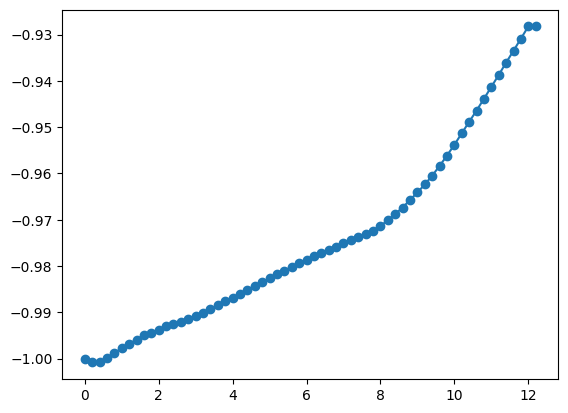

In [36]:
plt.plot(x_sorted, y_total_energy_normalized, marker='o', linestyle='-', label='Normalized total energy')

In [37]:
data_sorted['consistency_PE'] = data_sorted.iloc[:, 7] == data_sorted.iloc[:, 14]

In [38]:
data_sorted['consistency_KE'] = data_sorted.iloc[:, 8] == data_sorted.iloc[:, 15]

In [39]:
print(data_sorted)

       0            1           2         3         4         5         6  \
44   0.0  281829600.0  54226900.0  0.000000  0.000000  0.000000  0.000000   
5    0.2  281197152.0  56876625.0  0.000005 -0.000002  0.000004  0.000007   
25   0.4  280771072.0  58369025.0  0.000010  0.000005  0.000002  0.000011   
28   0.6  280403168.0  58318650.0  0.000008  0.000002  0.000008  0.000011   
4    0.8  280076544.0  58568900.0 -0.000002 -0.000004 -0.000004  0.000005   
..   ...          ...         ...       ...       ...       ...       ...   
16  11.4  274537568.0  58978725.0  0.002411  0.000011 -0.000955  0.002593   
35  11.6  274492064.0  58932900.0  0.002501  0.000004 -0.000976  0.002684   
30  11.8  274427712.0  58858150.0  0.002584 -0.000001 -0.001002  0.002771   
31  12.0  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   
47  12.2  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   

               7             8             9  ...       11       12        

In [40]:
data_sorted['self_energy'] = data_sorted.iloc[:, 7] + data_sorted.iloc[:, 8]

In [42]:
initial_self_energy_value = abs(data_sorted.loc[data_sorted.iloc[:, 0] == 0, 'self_energy'].values[0])

In [43]:
print(initial_self_energy_value)

73058612589.71219


In [44]:
data_sorted['self_energy_normalized'] = data_sorted['self_energy'] / initial_self_energy_value

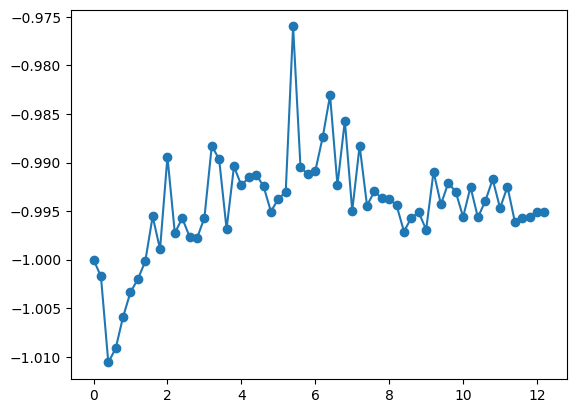

In [45]:
self_energy_normalized = data_sorted['self_energy_normalized']
plt.plot(x_sorted, self_energy_normalized, marker='o', linestyle='-', label='Normalized self energy')

In [47]:
print(data_sorted)

       0            1           2         3         4         5         6  \
44   0.0  281829600.0  54226900.0  0.000000  0.000000  0.000000  0.000000   
5    0.2  281197152.0  56876625.0  0.000005 -0.000002  0.000004  0.000007   
25   0.4  280771072.0  58369025.0  0.000010  0.000005  0.000002  0.000011   
28   0.6  280403168.0  58318650.0  0.000008  0.000002  0.000008  0.000011   
4    0.8  280076544.0  58568900.0 -0.000002 -0.000004 -0.000004  0.000005   
..   ...          ...         ...       ...       ...       ...       ...   
16  11.4  274537568.0  58978725.0  0.002411  0.000011 -0.000955  0.002593   
35  11.6  274492064.0  58932900.0  0.002501  0.000004 -0.000976  0.002684   
30  11.8  274427712.0  58858150.0  0.002584 -0.000001 -0.001002  0.002771   
31  12.0  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   
47  12.2  274332160.0  58907875.0  0.002681 -0.000028 -0.001029  0.002871   

               7             8             9  ...        13            14  